# Monopoly and Markov Chains


The goal of this project is to use Markov chains to model the game of Monopoly. We aim to answer some simple questions about the game:
- What are the locations visited the most often? 
- After how many turns is the game at an equilibrium?
- Is there a better strategy? Should one always build hotels? Can we stick to houses?

To ease the analysis we will simplify some of the rules by simplifying the rules to get out of jail, and neglect the effect of the "Chance" and the "Community chest" cards. We will also consider players that always stick to the same strategy.

Most of the following analysis were motivated by two articles from Ian stewarts in the Scientific American, (reproductions from the articles are linked [here](http://www.math.yorku.ca/Who/Faculty/Steprans/Courses/2042/Monopoly/Monopoly.html) or available on the course page).



## Summary of the game

Those short explanations of the game are taken from [this website](http://www.durangobill.com/Monopoly.html). You can as well check the rules on the wikipedia page ([english](https://en.wikipedia.org/wiki/Monopoly_(game)), [german](https://de.wikipedia.org/wiki/Monopoly)). 

### Rules of the game

#### Dice Rolls: 

 - A player rolls **a pair of dice** and moves his board piece (token) clockwise around the board. The number of board spaces he moves is equal to the sum of the dice. 
 - If he stops on a "Chance" or "Community Chest" board space, he picks up a card from the indicated stack, and if instructed, moves his token to a new location. 
 - If he had doubles, he repeats this process. 
 - However, if he has three doubles in a row, he instead goes directly to Jail.

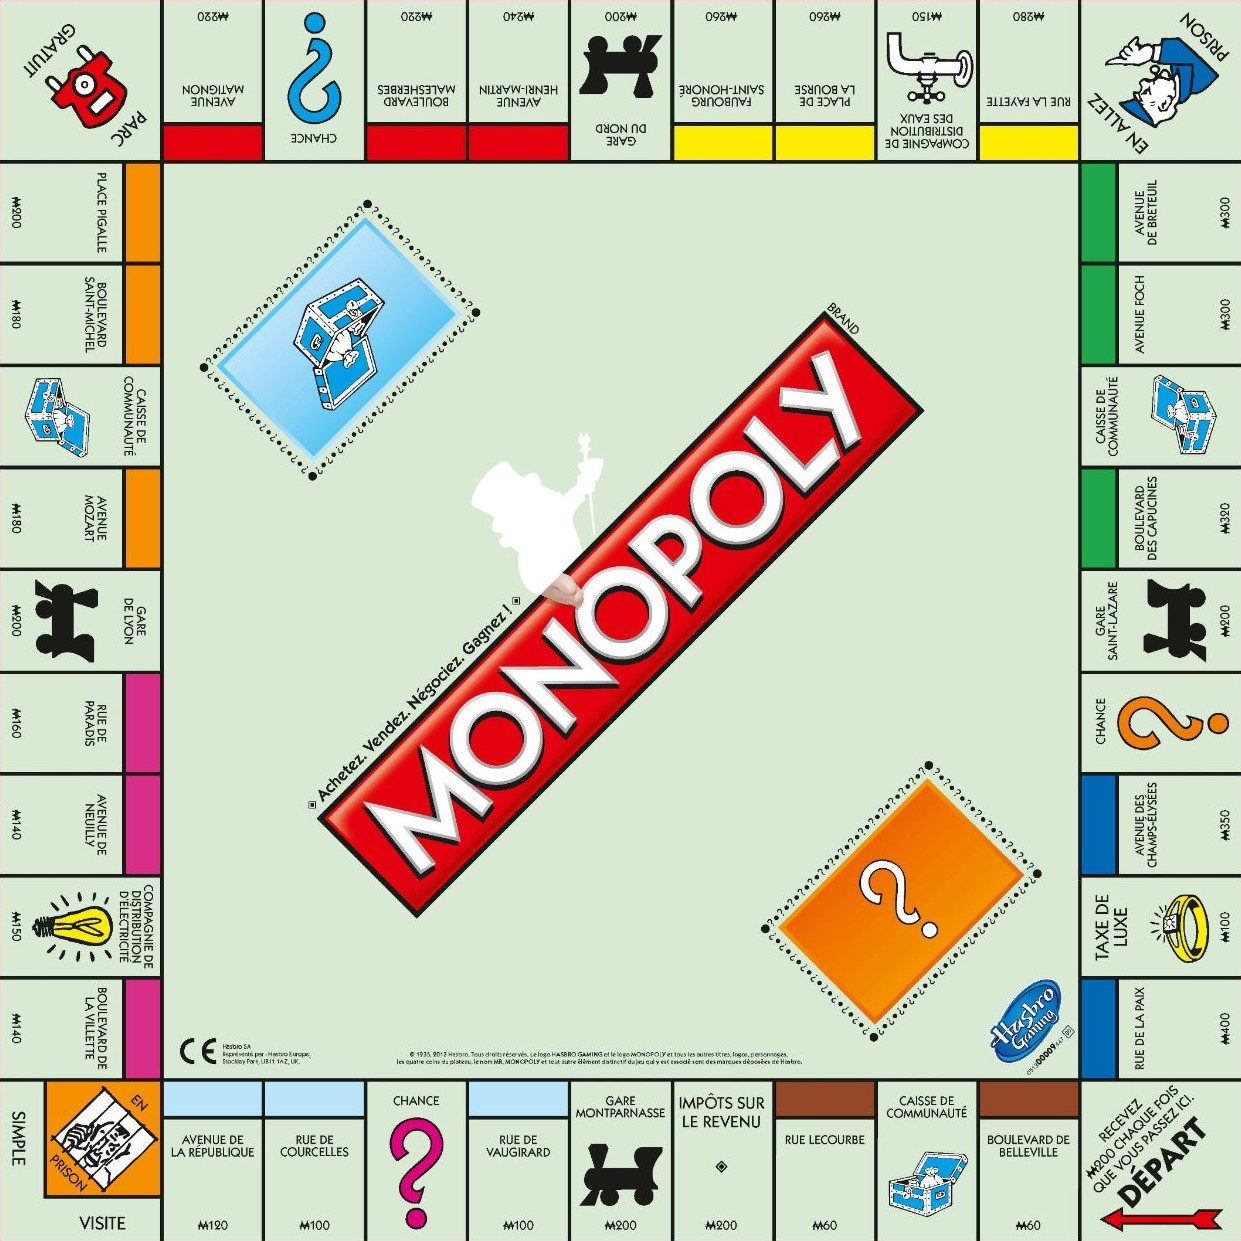



#### Going to Jail: 

If a player is instructed to go to Jail (at any point during his turn), his turn ends regardless of the doubles status. The player will stay at most 3 turns in Jail. He can go out of jail in one of the following manner:
- Paying is way out (50\$). In this case the token goes to "Just visiting" and the player can throw is dice as usual. 
- Using a Chance card. This is similar as paying 50\$.
- Rolling the dice. If there is a double, the player can go out and moves forwards of the number obtained with the dice. Note that in this case the player cannot roll the dice again (the double was "used" to get out of jail).


After the third turn, if the player does not get a double, he *must* pay 50\$ and moves of the number of spaces obtained with the dice.


## 1. Setting up the Markov Chain

In this first part we will set up the parameters for a Markov chain that models the movements of the token of the board from turn to turn. 
We make the following simplification to the rules: 
- Double with the Dice does not allow a second roll.
- We do not consider the cards in the Chance and Community chest slots.
- When getting into Jail, the player always pays 50\$ at the first turn to get out of jail.


We start by constructing the markov chain.

In [1]:
%pip install uv
%pip install --upgrade nbformat

/Users/hendrik/Documents/HPI-MA/S1/APML/ImageClustering/.venv/bin/python: No module named pip
Note: you may need to restart the kernel to use updated packages.
/Users/hendrik/Documents/HPI-MA/S1/APML/ImageClustering/.venv/bin/python: No module named pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
!uv pip install pandas
!uv pip install tqdm
!uv pip install --upgrade plotly
!uv pip install "plotly[kaleido]"
!uv pip install imageio
!uv pip install pycairo
!uv pip install cairosvg

Using Python 3.10.16 environment at: /Users/hendrik/Documents/HPI-MA/S1/APML/ImageClustering/.venv
Audited 1 package in 18ms
Using Python 3.10.16 environment at: /Users/hendrik/Documents/HPI-MA/S1/APML/ImageClustering/.venv
Audited 1 package in 1ms
Using Python 3.10.16 environment at: /Users/hendrik/Documents/HPI-MA/S1/APML/ImageClustering/.venv
Resolved 3 packages in 281ms                                         
⠙ Preparing packages... (0/1)                                                   
⠙ Preparing packages... (0/1)----     0 B/9.44 MiB                      
⠙ Preparing packages... (0/1)---- 16.00 KiB/9.44 MiB                    
⠙ Preparing packages... (0/1)---- 32.00 KiB/9.44 MiB                    
⠙ Preparing packages... (0/1)---- 48.00 KiB/9.44 MiB                    
⠙ Preparing packages... (0/1)---- 62.22 KiB/9.44 MiB                    
⠙ Preparing packages... (0/1)---- 78.22 KiB/9.44 MiB                    
⠙ Preparing packages... (0/1)---- 94.22 KiB/9.44 MiB           

In [3]:
import numpy as np
import plotly.express as px

#Sorry the street names are in French! 
#you can replace it with the colors as in the table file
squares = [
"Départ",
"Boulevard de Belleville",
"Caisse de Communauté-1",
"Rue Lecourbe",
"Impôts sur le Revenu",
"Gare Montparnasse",
"Rue de Vaugirard",
"Chance-1",
"Rue de Courcelles",
"Avenue de la République",
"Visite de Prison",
"Boulevard de la Villette",
"Compagnie de Distribution d Électricité",
"Avenue de Neuilly",
"Rue de Paradis",
"Gare de Lyon",
"Avenue Mozart",
"Caisse de Communauté-2",
"Boulevard Saint-Michel",
"Place Pigalle",
"Parc Gratuit",
"Avenue Matignon",
"Chance-2",
"Boulevard Malesherbes",
"Avenue Henri-Martin",
"Gare du Nord",
"Faubourg Saint-Honoré",
"Place de la Bourse",
"Compagnie de Distribution des Eaux",
"Rue La Fayette",
"Allez en Prison",
"Avenue de Breteuil",
"Avenue Foch",
"Caisse de communauté-3",
"Boulevard des Capucines",
"Gare Saint-Lazare",
"Chance-3",
"Avenue des Champs-Élysées",
"Taxe de Luxe",
"Rue de la Paix"]

brown = [1,3]
light_blue = [6,8,9]
pink = [11, 13, 14]
orange = [16, 18, 19]
red = [21, 23,24]
yellow = [26, 27, 29]
green = [31,32, 34]
blue = [37, 39]

# squares += ["Prison"]
nsquares = len(squares)

colors = np.array(['hsv(0,0%,50%)               ']*nsquares)
# colors = np.array(['hsv(0,100%,100%)']*nsquares)
colors[brown] = 'hsv(30,75%,65%)'
colors[light_blue] = 'hsv(195,26%,90%)'
colors[pink] = 'hsv(350,25%,100%)'
colors[orange] = 'hsv(39,100%,100%)'
colors[red] ='hsv(0,100%,100%)'
colors[yellow] = 'hsv(60,100%,100%)'
colors[green] = 'hsv(120,100%,50%)'
colors[blue] = 'hsv(240,100%,100%)'

##Some easy links
dict_squares = dict((x, i) for i,x in enumerate(squares))
iprison = dict_squares["Allez en Prison"] ## This square is in fact never visited 
ivisite = dict_squares["Visite de Prison"]

#Construct a 12 element array with all dice probabilities
TwoDices = np.zeros(12, dtype=np.float64)
TwoDices = np.array([len([(j,k) for j in range(1,7) for k in range(1,7) if j + k == i]) / 36 for i in range(2,13)])
print(TwoDices)


## The initial probability. Note that we set a vector to allow matrix product computations 
## afterwards.
pi=np.zeros((1, nsquares))
pi[0,0] = 1
##Set up the Transition Matrix
A = np.zeros((nsquares, nsquares), dtype=np.float64)

###YOUR CODE HERE
for square in dict_squares:
    for j in range(2,13):
        i = dict_squares[square]
        # if square == "Prison":
        #     A[i][(ivisite + j) % (nsquares - 1)] += TwoDices[j - 2]
        if i == iprison:
            continue
        if (i + j) % nsquares == iprison:
            A[i][ivisite] += TwoDices[j - 2]
        else:
            A[i][(i+j) % nsquares] += TwoDices[j - 2]

fig = px.imshow(A, text_auto=True)
fig.show()

for i in range(nsquares):
    s = np.sum(A[i])
    if s != 1.0:
        print(i, squares[i], s)


[0.02777778 0.05555556 0.08333333 0.11111111 0.13888889 0.16666667
 0.13888889 0.11111111 0.08333333 0.05555556 0.02777778]


30 Allez en Prison 0.0



## 2. After a few game turns.

Compute the probability of occupation on the board after a few turns of games. You will produce a set of histograms in the like of the one below


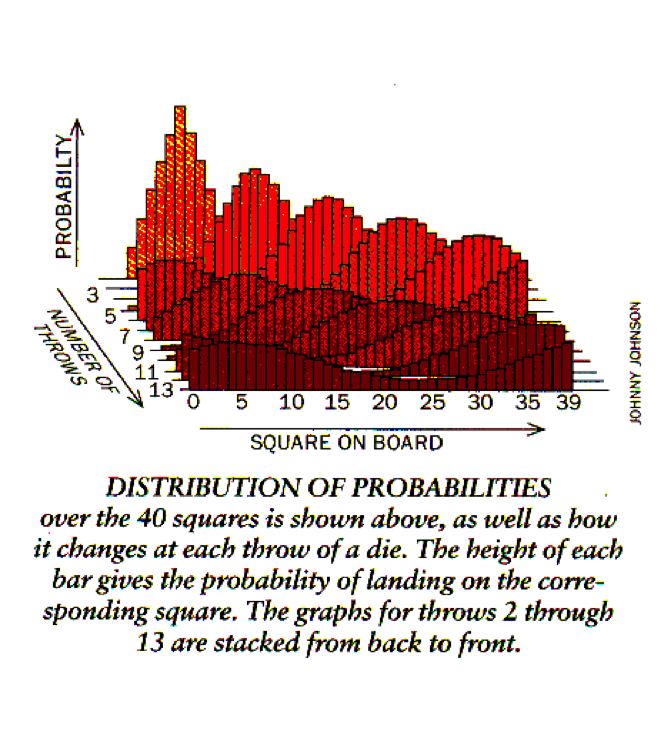


In [4]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

In [5]:
board_turn_3 = (pi @ np.linalg.matrix_power(A, 3)).flatten()
board_turn_7 = (pi @ np.linalg.matrix_power(A, 7)).flatten()
board_turn_13 = (pi @ np.linalg.matrix_power(A, 13)).flatten()
board_turn_100 = (pi @ np.linalg.matrix_power(A, 100)).flatten()


##Your plotting command here
fig = make_subplots(rows=4, cols=1, shared_xaxes=True, subplot_titles=["Turn 3", "Turn 7", "Turn 13", "Turn 100"])

fig.add_trace(go.Bar(x = squares, y = board_turn_3, marker = dict(color=colors.tolist())), row=1, col=1)
fig.add_trace(go.Bar(x = squares, y = board_turn_7, marker = dict(color=colors.tolist())), row=2, col=1)
fig.add_trace(go.Bar(x = squares, y = board_turn_13, marker = dict(color=colors.tolist())),row=3, col=1)
fig.add_trace(go.Bar(x = squares, y = board_turn_100, marker = dict(color=colors.tolist())),row=4, col=1)

fig.update_layout(
    height = 1200
)
fig.show()

Observations: normalizes relatively quickly; fields after prison are significantly more likely, especially community field after 7 fields

In [6]:
turns = []
boards = []

for i in range(1, 22, 2):
    turns.append(i)
    boards.append(pi @ np.linalg.matrix_power(A, i))

fig = go.Figure()

for turn, board in zip(turns, boards):
    fig.add_trace(
        go.Scatter3d(
            x=np.full(nsquares, turn),
            y= np.arange(nsquares),
            z= board.flatten(),
            mode="lines+markers",
            name=f"Turn {turn}"
        )

    )

fig.update_layout(
    scene=dict(
        xaxis_title="Turns",
        yaxis_title="Squares",
        zaxis_title="Probabilities"
    )
)


fig.show()

## 3.a Computing the stationary distribution


Compute the stationary distribution $\mu$ of the Markov Chain, by using either one of the following properties:
 - $\lim_{n\rightarrow \infty} A^n = \mu$
 - $\mu \cdot A = \mu$. In other word $\mu$ is the eigenvector associated with the eigenvalue $1$.
 
Both can be obtained with the linear algebra functions of numpy. 

Verify that you get something similar to this image (this will not be exactly the same as it was obtained from a more detailled model):

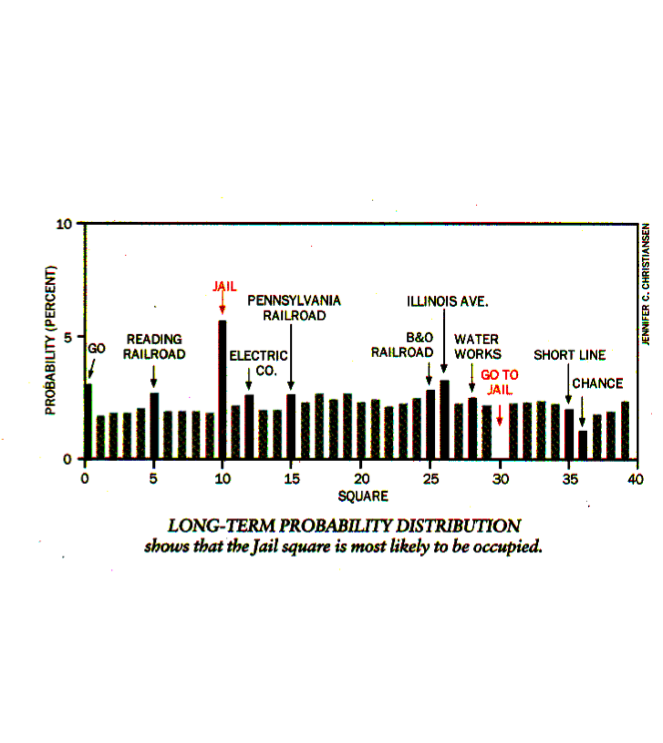


Under the assumption that $2000 \approx \infty$

In [7]:
#np.linalg.matrix_power is one function you can use

stationary = np.linalg.matrix_power(A, 2000)[0] # same as pi @
fig = go.Figure([go.Bar(x = squares, y = stationary, marker = dict(color=colors.tolist()))], layout={"height":700})
fig.show()

In [8]:
n = 1
maxTurns = 20
for i in range(maxTurns):
    mu = pi @ np.linalg.matrix_power(A, n)

    if np.allclose(mu @ A, mu, atol=1e-10):
        print(f"Power Level:{n}")
        print(mu)
        fig = px.bar(x=np.arange(nsquares), y=mu.flatten(), title="Stationary Monopoly")
        fig.show()
        break

    n *= 10

Power Level:100
[[0.02293944 0.0231179  0.02331294 0.02357172 0.02320021 0.02300556
  0.02293431 0.02294521 0.02300402 0.02307899 0.05       0.02313804
  0.02386288 0.0245838  0.02533064 0.0261278  0.02699816 0.02796689
  0.02755225 0.02726806 0.02706056 0.0268821  0.02668706 0.02642828
  0.02679979 0.02699444 0.02706569 0.02705479 0.02699598 0.02692101
  0.         0.02686196 0.02613712 0.0254162  0.02466936 0.0238722
  0.02300184 0.02203311 0.02244775 0.02273194]]


Can you explain why some locations are more visited than others?

Because there is a jail in the Monopoly game, the probabilities are not completely identical to those of a typical dice roll. The jail square has a significantly higher probability due to the position change, as there are two ways to land on this square. The squares after prison also have a slightly higher probability of being landed on, as players coming out of prison land on them, compared to the squares before prison. We can observe this especially well looking at Caisse de Communauté-2, the seventh square after the prison, which is the most likely outcome of the sum of two dice.

## 3b. Convergence to the stationnary distribution

Use the successive powers of the matrix to determine the number of turns after which the chain converged to the stationary distribution (_e.g._ when the difference between the distribution of the rows of the matrix and the stationnary distribution is below 1%)



In [9]:
from copy import deepcopy

In [62]:
# Your code here
def total_variation(d1, d2):
    return 0.5 * (np.sum(np.abs(d1 - d2)))

power = deepcopy(A)

for i in range(1, 2000):
    power = power @ A
    tv = total_variation(pi @ power, stationary)
    if tv < (1 / pow(nsquares,3)):
        print(f"Convergence after {i} iterations with maximal total variation dist of {tv}")
        break

Convergence after 84 iterations with maximal total variation dist of 1.3808874132525614e-05


## 3c. Evaluating investments   

We provide in attachment a table with all the incomes associated to the various properties of the board. Let's see how we can use that information to understand how to evaluate the various real estate investments on the board.

For each square $k$ of the monopoly, we thus know the cost $c_{k}$ of the property, the price $h_k$ of an house and the rent $r_{k,h}$ with $h$ house. The total cost of a property with $h$ house is $c_{k,h}= c_k + h\cdot h_k$ 

1. Verify that the expected income per opponent turn on square $k$ is $i_{k,h} = \mu_k \cdot r_{k,h}$ and compute this value for all square and all number of houses. For instance a property where an opponent as 5% chance of landing with a rent of 100\\$ provides an expected income per turn of 5\\$.

2. Now an interesting quantity is the expected number of opponents turns before we are able to return on our investment with buying the property. For instance if the property mentionned in q.1 costed 50\\$, given that we expect to earn 5\\$ per turn with no house, our average waiting time before returning on our investment will be after $\frac{50}{5}=10$ opponent turns. Verify that the general formula for this value is:
$$
e_{k,h} = \frac{c_{k,h}} {i_{k,h}}
$$

3. compute $e_{k,h}$ for all square and all number of houses and check the most rentable properties, as a function of the number of houses.

4. (optional). Compute the expected number of turns to get a return of investment on a given color.


5. A classical recommendation for Monopoly is to buy orange properties, can you back up this claim?

In [11]:
# read monopoly square data in Monopoly_square_data.csv

monopoly_data = pd.read_csv("Data/Monopoly_squares_data.csv")

possible_buildings = ["RENT_empty_property","RENT_1house","RENT_2houses","RENT_3houses","RENT_4houses","RENT_hotel"]

house_costs = monopoly_data["house_cost"]
property_costs = monopoly_data["Cost"]

def cost_houses(square, num_houses):
    return house_costs[square] + num_houses * house_costs[square]

# Compute i_k_h 
income = np.zeros((nsquares, len(possible_buildings)))
for square in squares:
    i = dict_squares[square]
    if monopoly_data["Cost"][i] == np.nan:
        continue
    for j,name in enumerate(possible_buildings):
        income[i][j] = stationary[i] * monopoly_data[name][i]

# Compute e_k_h
expected_roi = np.zeros((nsquares, len(possible_buildings)))
for square in squares:
    i = dict_squares[square]
    if np.isnan(monopoly_data["Cost"][i]):
        for j in range(len(possible_buildings)):
            expected_roi[i][j] = np.nan
        continue
    for j,name in enumerate(possible_buildings):
        expected_roi[i][j] = cost_houses(i,j) / income[i][j]


property_squares = [i for i in range(nsquares) if not np.isnan(expected_roi[i][0])]
property_colors = colors[property_squares]
for j in range(len(possible_buildings)):
    property_roi = [expected_roi[i][j] for i in property_squares]
    fig = go.Figure([go.Bar(x = np.array(squares)[property_squares], y = property_roi, marker = dict(color=property_colors.tolist()))])
    fig.update_layout(title=f"Expected ROI for{possible_buildings[j]}")
    fig.show()



In [12]:
import pandas as pd
# read monopoly square data in Monopoly_square_data.csv
costs_squares = pd.read_csv("./Data/Monopoly_squares_data.csv")
costs_squares

,Slot,Cost,RENT_empty_property,RENT_color_set,RENT_1house,RENT_2houses,RENT_3houses,RENT_4houses,RENT_hotel,house_cost
0,Go,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Brown 1,60.0,2.0,4.0,10.0,30.0,90.0,160.0,250.0,50.0
2,Community Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Brown 2,60.0,4.0,8.0,20.0,60.0,180.0,320.0,450.0,50.0
4,Income Tax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Railroad 1,200.0,NaN,NaN,25.0,50.0,100.0,200.0,NaN,NaN
6,Light Blue 1,100.0,6.0,12.0,30.0,90.0,270.0,400.0,550.0,50.0
7,Chance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Light Blue 2,100.0,6.0,12.0,30.0,90.0,270.0,400.0,550.0,50.0
9,Light Blue 3,120.0,8.0,16.0,40.0,100.0,300.0,450.0,600.0,50.0


In [13]:
# Compute i_k_h
i_k_h = costs_squares.iloc[:, [2,3,4, 5, 6, 7, 8]].mul(stationary.flatten()[:40], axis=0)
i_k_h

,RENT_empty_property,RENT_color_set,RENT_1house,RENT_2houses,RENT_3houses,RENT_4houses,RENT_hotel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.046236,0.092472,0.231181,0.693542,2.080627,3.698892,5.779519
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.094288,0.188575,0.471438,1.414313,4.242938,7.543002,10.607346
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,0.575142,1.150285,2.300569,4.601138,NaN
6,0.137606,0.275213,0.688032,2.064097,6.192291,9.173765,12.613927
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.138024,0.276049,0.690122,2.070367,6.211102,9.201633,12.652245
9,0.184632,0.369264,0.923161,2.307902,6.923707,10.385560,13.847414


In [14]:
costs_squares = costs_squares[costs_squares["RENT_empty_property"].notna() & costs_squares["RENT_1house"].notna()]

In [15]:
# Compute c_k_h
house_numbers = [0, 0, 1, 2, 3, 4, 5]

c_k_h = pd.DataFrame(
    np.outer(costs_squares["house_cost"], house_numbers),
    index=costs_squares.index,
    columns=["0 houses", "color set", "1 house", "2 houses", "3 houses", "4 houses", "hotel"]
)

c_k_h = c_k_h.add(costs_squares["Cost"], axis=0)
c_k_h

,0 houses,color set,1 house,2 houses,3 houses,4 houses,hotel
1,60.0,60.0,110.0,160.0,210.0,260.0,310.0
3,60.0,60.0,110.0,160.0,210.0,260.0,310.0
6,100.0,100.0,150.0,200.0,250.0,300.0,350.0
8,100.0,100.0,150.0,200.0,250.0,300.0,350.0
9,120.0,120.0,170.0,220.0,270.0,320.0,370.0
11,140.0,140.0,240.0,340.0,440.0,540.0,640.0
13,140.0,140.0,240.0,340.0,440.0,540.0,640.0
14,160.0,160.0,260.0,360.0,460.0,560.0,660.0
16,180.0,180.0,280.0,380.0,480.0,580.0,680.0
18,180.0,180.0,280.0,380.0,480.0,580.0,680.0


In [16]:
# Compute e_k_h
i_k_h_tmp = i_k_h[['RENT_empty_property', 'RENT_color_set', 'RENT_1house', 'RENT_2houses', 'RENT_3houses', 'RENT_4houses', 'RENT_hotel']]
i_k_h_tmp.columns = c_k_h.columns

e_k_h = c_k_h / i_k_h_tmp
e_k_h = e_k_h[e_k_h["0 houses"].notna()]
e_k_h

,0 houses,color set,1 house,2 houses,3 houses,4 houses,hotel
1,1297.685930,648.842965,475.818174,230.699721,100.931128,70.291321,53.637685
3,636.351447,318.175723,233.328864,113.129146,49.494001,34.469037,29.225029
6,726.709998,363.354999,218.012999,96.894666,40.372778,32.701950,27.747109
8,724.509076,362.254538,217.352723,96.601210,40.250504,32.602908,27.663074
9,649.940867,324.970433,184.149912,95.324660,38.996452,30.812011,26.719791
11,605.064783,302.532391,207.450783,97.962870,42.258493,37.341141,36.880139
13,569.482423,284.741211,195.251116,92.201916,39.773376,35.145201,34.711310
14,526.373575,263.186787,171.071412,78.956036,36.319777,31.582414,28.950547
16,476.225128,238.112564,148.158929,70.375491,32.325584,28.644060,26.512650
18,466.648383,233.324191,145.179497,68.960261,31.675527,28.068036,25.979489


In [17]:
# Best Square for each house count
best_square = e_k_h.idxmin()
best_square

0 houses     39
color set    39
1 house      29
2 houses     29
3 houses     19
4 houses     19
hotel        19
dtype: int64

- 39: Dark Blue 2 (high rent for no houses)
- 29: Yellow 3 (best rent ratio for less houses)
- 19: Orange 3 (best rent ratio for many houses; 9 fields behind prision)

#### ROI per color set

In [18]:
costs_squares_color = costs_squares.copy()
costs_squares_color = costs_squares_color[costs_squares_color["RENT_empty_property"].notna() & costs_squares_color["RENT_1house"].notna()]
costs_squares_color["Color"] =  costs_squares_color["Slot"].str[:-1]
costs_squares_color

c_k_h_color = c_k_h.merge(costs_squares_color[["Color"]], left_index=True, right_index=True)
c_k_h_color = c_k_h_color.groupby("Color").sum()
i_k_h_color = i_k_h_tmp.merge(costs_squares_color[["Color"]], left_index=True, right_index=True)
i_k_h_color = i_k_h_color.groupby("Color").sum()
e_k_h_color = c_k_h_color / i_k_h_color
e_k_h_color

,0 houses,color set,1 house,2 houses,3 houses,4 houses,hotel
Color,,,,,,,
Brown,853.948666,426.974333,313.114511,151.813096,66.418230,46.255553,37.835182
Dark Blue,393.129446,196.564723,146.797230,69.249998,39.600439,40.381512,40.954300
Green,444.718930,222.359465,143.527482,66.727689,37.585320,37.769162,38.389543
Light Blue,695.254442,347.627221,204.230992,96.237923,39.840430,31.987808,27.356224
Orange,466.671226,233.335613,143.334734,68.602662,31.490415,28.058129,26.046103
Pink,563.247531,281.623765,189.455988,88.754156,39.250076,34.484588,33.112128
Red,454.674980,227.337490,151.112567,73.944397,35.355524,34.716406,34.286986
Yellow,435.551946,217.775973,136.109983,61.703192,32.487615,32.353887,32.260279


In [19]:
best_color = e_k_h_color.idxmin()
best_color

0 houses     Dark Blue 
color set    Dark Blue 
1 house         Yellow 
2 houses        Yellow 
3 houses        Orange 
4 houses        Orange 
hotel           Orange 
dtype: object

### Is choosing orange a good strategy?

The strategy of going for orange colors in Monopoly is correct for several reasons. As mentioned at the beginning, the probability of landing on an orange square is higher because it is located after the jail. On the other hand, orange has a good rent-to-cost ratio, so it quickly pays off. With 3 or more houses, it is the square that pays off the fastest.

## 4. Improving the model

By using the article provided on the moodle (also reproduced [at this adress](http://www.math.yorku.ca/Who/Faculty/Steprans/Courses/2042/Monopoly/Stewart4.html)), design a more realistic transition matrix that would take into account double on the dice as well as the traditional getting out of jail.

You will integrate the following ingredients:
  - Double allow the player to do a second roll.
  - After three double the player goes to jail.
  - To simplify, we also hypothesize that the player cannot buy properties on the intermediate squares in a serie of doubles. 
  - Player always try to get out of jail by throwing the dice up to three times
  - (optional) Account for the cards in Chance and community chests that redirect the token to other cases (more details are given in the article and you can look online what are the statistics for the cards)

To take this information into account in the Markov chain you can increase the state space by consider for each square the number of doubles you did when you landed on it. So now each square will correspond to 3 states in the Markov chain, the ID of the square, together with an additional field that stores the information about the number of doubles. 

For instance imagine you start from (0, "Départ"):
  - if you throw two 3, that's a double and you will land on square 6 ("Rue de Vaugirard") while keeping the information that you did a double so you will be in state (1, "Rue de Vaugirard"). 
  - if you throw a 2 and a 4, that's not a double and you will land on state (0, "Rue de Vaugirard").

In [20]:
## Design the improved transition matrix here

# possible transitions:
# 0 to 0 (no doubles)
# 0 to 1 (doubles)
# 1 to 1 (no second double)
# 1 to 2 (second double)
# 2 to 2 (no third double)
# third double - guess what, right to jail
# jail (0,1,2,3) - try with doubles, when in 3 then buy and progress normal

# could chain the calculation:
# start_state * (Mat_1_throw + Mat_1_double + Mat_2_double + Mat_3_double)
# Mat 1 throw - (almost) same as before, minus the probabilities of the double throws
# Mat 1 double throw - like above but now ONLY doubles
# should be able to combine these

squares_improved = [
"Départ",
"Boulevard de Belleville",
"Caisse de Communauté-1",
"Rue Lecourbe",
"Impôts sur le Revenu",
"Gare Montparnasse",
"Rue de Vaugirard",
"Chance-1",
"Rue de Courcelles",
"Avenue de la République",
"Visite de Prison",
"Boulevard de la Villette",
"Compagnie de Distribution d Électricité",
"Avenue de Neuilly",
"Rue de Paradis",
"Gare de Lyon",
"Avenue Mozart",
"Caisse de Communauté-2",
"Boulevard Saint-Michel",
"Place Pigalle",
"Parc Gratuit",
"Avenue Matignon",
"Chance-2",
"Boulevard Malesherbes",
"Avenue Henri-Martin",
"Gare du Nord",
"Faubourg Saint-Honoré",
"Place de la Bourse",
"Compagnie de Distribution des Eaux",
"Rue La Fayette",
"Allez en Prison",
"Avenue de Breteuil",
"Avenue Foch",
"Caisse de communauté-3",
"Boulevard des Capucines",
"Gare Saint-Lazare",
"Chance-3",
"Avenue des Champs-Élysées",
"Taxe de Luxe",
"Rue de la Paix"
]

squares_improved +=["Prison0"]
squares_improved += ["Prison1"]
squares_improved += ["Prison2"]

brown = [1,3]
light_blue = [6,8,9]
pink = [11, 13, 14]
orange = [16, 18, 19]
red = [21, 23,24]
yellow = [26, 27, 29]
green = [31,32, 34]
blue = [37, 39]

# squares += ["Prison"]
nsquares_imp = len(squares_improved)
nsquaresNoPrisons = len(squares_improved) - 3

colors = np.array(['hsv(0,0%,50%)               ']*nsquares_imp)
# colors = np.array(['hsv(0,100%,100%)']*nsquares)
colors[brown] = 'hsv(30,75%,65%)'
colors[light_blue] = 'hsv(195,26%,90%)'
colors[pink] = 'hsv(350,25%,100%)'
colors[orange] = 'hsv(39,100%,100%)'
colors[red] ='hsv(0,100%,100%)'
colors[yellow] = 'hsv(60,100%,100%)'
colors[green] = 'hsv(120,100%,50%)'
colors[blue] = 'hsv(240,100%,100%)'

##Some easy links
dict_squares_imp = dict((x, i) for i,x in enumerate(squares_improved))
iprison_imp = dict_squares_imp["Allez en Prison"] ## This square is in fact never visited 
ivisite_imp = dict_squares_imp["Visite de Prison"]

TwoDiceDoubles = [1/36 if i % 2 == 0 else 0 for i in range(2,13)]
TwoDiceNoDoubles = np.convolve(np.ones(6)/6, np.ones(6)/6) - TwoDiceDoubles

print(TwoDiceNoDoubles)
print(TwoDiceDoubles)


[0.         0.05555556 0.05555556 0.11111111 0.11111111 0.16666667
 0.11111111 0.11111111 0.05555556 0.05555556 0.        ]
[0.027777777777777776, 0, 0.027777777777777776, 0, 0.027777777777777776, 0, 0.027777777777777776, 0, 0.027777777777777776, 0, 0.027777777777777776]


In [21]:
NoDoubles = np.zeros((nsquares_imp, nsquares_imp), dtype=np.float64)
# movement probabilities, given that no double is thrown
tmp = np.zeros(nsquaresNoPrisons, dtype=np.float64)
padding = np.zeros((3,), dtype=np.float64)
tmp[:11] = TwoDiceNoDoubles
for i in range(nsquaresNoPrisons):
    if i == iprison:
        continue
    NoDoubles[i] = np.hstack((np.roll(tmp, i + 2), padding))

iPrison0 = dict_squares_imp["Prison0"]
iPrison1 = dict_squares_imp["Prison1"]
iPrison2 = dict_squares_imp["Prison2"]

NoDoubles[:,iPrison0] = NoDoubles[:,iprison]
NoDoubles[:,iprison] = 0.0

fig = px.imshow(NoDoubles, text_auto=True)
fig.show()


In [22]:
DoublesNoJail = np.zeros((nsquares_imp, nsquares_imp), dtype=np.float64)
# movement probabilities, given that a double is thrown
tmp = np.zeros(nsquaresNoPrisons, dtype=np.float64)
padding = np.zeros((3,), dtype=np.float64)
tmp[:11] = TwoDiceDoubles
for i in range(nsquaresNoPrisons):
    if i == iprison:
        continue
    DoublesNoJail[i] = np.hstack((np.roll(tmp, i + 2), padding))

DoublesNoJail[:,iPrison0] = DoublesNoJail[:,iprison]
DoublesNoJail[:,iprison] = 0.0 
# DoublesNoJail[iPrison0][iPrison0] = 1.0
# prisonExit = np.hstack((np.roll(tmp, ivisite + 2), padding))

fig = px.imshow(DoublesNoJail, text_auto=True)
fig.show()

In [23]:
EscapingFromJail = np.zeros((nsquares_imp, nsquares_imp), dtype=np.float64)
# movement probabilities, given that a double is thrown, starting from jail
tmp = np.zeros(nsquaresNoPrisons, dtype=np.float64)
padding = np.zeros((3,), dtype=np.float64)
tmp[:11] = TwoDiceDoubles

EscapingFromJail[:,iPrison0] = EscapingFromJail[:,iprison]
EscapingFromJail[:,iprison] = 0.0 
prisonExit = np.hstack((np.roll(tmp, ivisite + 2), padding))
prisonStay = 1 - np.sum(tmp)
EscapingFromJail[iPrison0] = prisonExit
EscapingFromJail[iPrison1] = prisonExit
EscapingFromJail[iPrison2] = prisonExit
EscapingFromJail[iPrison0][iPrison1] = prisonStay
EscapingFromJail[iPrison1][iPrison2] = prisonStay
tmp = np.zeros(nsquares_imp, dtype=np.float64)
tmp[:11] = TwoDices
EscapingFromJail[iPrison2] = np.roll(tmp, ivisite + 2)

fig = px.imshow(EscapingFromJail, text_auto=True)
fig.show()

In [24]:
MaybeToJail = np.zeros((nsquares_imp, nsquares_imp), dtype=np.float64)
# movement probabilities, given that the third double is thrown
tmp = np.zeros(nsquaresNoPrisons, dtype=np.float64)
padding = np.zeros((3,), dtype=np.float64)
tmp[:11] = TwoDiceNoDoubles
for i in range(nsquaresNoPrisons):
    if i == iprison:
        continue
    MaybeToJail[i] = np.hstack((np.roll(tmp, i + 2), padding))
    MaybeToJail[i][iPrison0] = np.sum(TwoDiceDoubles)

MaybeToJail[:,iPrison0] += MaybeToJail[:,iprison]
MaybeToJail[:,iprison] = 0.0
# MaybeToJail[iPrison0][iPrison0] = 1.0

fig = px.imshow(MaybeToJail, text_auto=True)
fig.show()

Recompute the values of question 2 and 3a with this new matrix and comment on possible difference.

In [25]:
GetJailColumn = np.zeros((nsquares_imp, nsquares_imp))
GetJailColumn[iPrison0][iPrison0] = 1

In [26]:
## Compute powers of the matrix and the stationary distribution

A_improved = NoDoubles \
            + DoublesNoJail @ NoDoubles + \
            + DoublesNoJail @ DoublesNoJail @ MaybeToJail \
            + EscapingFromJail \
            + (DoublesNoJail @ DoublesNoJail @ GetJailColumn) \
            + (DoublesNoJail @ GetJailColumn)

# A_improved[iPrison0][iPrison0] = 0.0

pi_improved=np.zeros((1, nsquares_imp))
pi_improved[0,0] = 1

print(np.array([sum(r) for r in A_improved]) - [1])

fig = px.imshow(NoDoubles, text_auto=True)
fig.show()
fig = px.imshow(DoublesNoJail @ NoDoubles + (DoublesNoJail @ GetJailColumn) , text_auto=True)
fig.show()
fig = px.imshow(DoublesNoJail @ DoublesNoJail @ MaybeToJail + (DoublesNoJail @ DoublesNoJail @ GetJailColumn), text_auto=True)
fig.show()


fig = px.imshow(A_improved, text_auto=True)
fig.show()

[ 2.22044605e-16  2.22044605e-16  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.22044605e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  4.44089210e-16  2.22044605e-16  0.00000000e+00  0.00000000e+00
  2.22044605e-16  0.00000000e+00 -1.11022302e-16  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.22044605e-16  0.00000000e+00  0.00000000e+00
 -2.22044605e-16  0.00000000e+00 -1.00000000e+00 -2.22044605e-16
 -1.11022302e-16 -1.11022302e-16  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.22044605e-16
  0.00000000e+00  0.00000000e+00  2.22044605e-16]


In [27]:
board_turn_3 = (pi_improved @ np.linalg.matrix_power(A_improved, 3)).flatten()
board_turn_7 = (pi_improved @ np.linalg.matrix_power(A_improved, 7)).flatten()
board_turn_13 = (pi_improved @ np.linalg.matrix_power(A_improved, 13)).flatten()


##Your plotting command here
fig = go.Figure([go.Bar(x = squares_improved, y = board_turn_3, marker = dict(color=colors.tolist()))], layout={"height":700})
fig.update_layout(title="Turn 3")
fig.show()
fig = go.Figure([go.Bar(x = squares_improved, y = board_turn_7, marker = dict(color=colors.tolist()))], layout={"height":700})
fig.update_layout(title="Turn 7")
fig.show()
fig = go.Figure([go.Bar(x = squares_improved, y = board_turn_13, marker = dict(color=colors.tolist()))],layout={"height":700})
fig.update_layout(title="Turn 13")
fig.show()

In [28]:
# 2000 to begin with
stationary_improved = np.linalg.matrix_power(A_improved, 2000)[0] # same as pi @
fig = go.Figure([go.Bar(x = squares_improved, y = stationary_improved, marker = dict(color=colors.tolist()))], layout={"height":700})
fig.show()

In [29]:
eigenvalues, eigenvectors = np.linalg.eig(A_improved.T)
eig_1_idx = np.argmin(np.abs(eigenvalues - 1.0))
stat = np.array([np.real(val) for val in eigenvectors[:,eig_1_idx]])
stat = stat / np.sum(stat)

fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=["Improved model", "Simple model"])

fig.add_trace(go.Bar(x = squares_improved, y = stat, marker = dict(color=colors.tolist())), row=1, col=1)
fig.add_trace(go.Bar(x = squares_improved, y = stationary, marker = dict(color=colors.tolist())), row=2, col=1)

fig.update_layout(
    height = 1000
)
fig.show()

### Differences between the models

In the simple model, we combined the Simple Visite with the actual prison state, as there is technically no difference, as you always exit in your first round there. 
This means that you will spend less time in prison in the simpler model and more time actually moving on the board, changing this aspect of the distribution. 

In the more complex model, we also have the possibility of moving further in a single turn, which also affects the shape of the distribution. In the simple model, as we noted above, you can observe, that Caisse de Communauté-2 is the most frequent square after the prison. In the more complex model this is no longer the case and the Avenue Mozart and Boulevard Saint-Michel are more frequent. This is explained by the strategy that you may escape from prison by rolling doubles, making the squares with an even distance to the prison more likely than before.

In [30]:
power = deepcopy(A_improved)

for i in range(1, 2000):
    power = power @ A_improved
    tv = total_variation(pi_improved @ power, stat)
    if tv < (pow(10,-5)):
        print(f"Convergence after {i} iterations with maximal total variation dist of {tv}")
        break

Convergence after 60 iterations with maximal total variation dist of 9.337253405168264e-06


## Verifying the model?

We now try to somehow verify our proposed transition Matrix $A_{\text{improved}}$. For this, we simulate the process of a player playing the game and record the respective transitions. After we normalize them, we observe, that the resulting transition distributions are close to our calculated transition matrix and get closer as we increase the amount of simulated turns.

In [31]:
from random import randrange
from tqdm import tqdm

In [32]:
# returns the sum of the dice and whether the caller rolled a double
def roll():
    d1 = randrange(1,7)
    d2 = randrange(1,7)
    return d1 + d2, d1 == d2

def turn(current):
    dice, double = roll()
    if current == iPrison0 or current == iPrison1:
        if not double:
            return iPrison1 if current == iPrison0 else iPrison2
        return ivisite + dice
    if current == iPrison2:
        return ivisite + dice
    doubleCount = 0
    while doubleCount < 3:
        current = (current + dice) % nsquaresNoPrisons
        if current == iprison:
            return iPrison0
        if not double:
            return current
        doubleCount += 1
        dice, double = roll()
    return iPrison0


In [33]:
ROUNDS = 100_000_000

current = 0
counts = np.zeros((nsquares_imp, nsquares_imp), np.uint64)
for _ in tqdm(range(ROUNDS)):
    next = turn(current)
    counts[current,next] += 1
    current = next

freq = np.zeros((nsquares_imp, nsquares_imp), np.float64)
for i in range(nsquares_imp):
    s = np.sum(counts[i])
    if s == 0:
        continue
    for j in range(nsquares_imp):
        freq[i,j] = counts[i,j] / s

100%|██████████| 100000000/100000000 [01:46<00:00, 937082.92it/s]


In [34]:
fig = px.imshow(freq, text_auto=True)
fig.show()
experimentalVariations = [total_variation(row_s, row_e) for row_s, row_e in zip(A_improved, freq)]
maxVariationToStationary = np.max(experimentalVariations)
maxVariationField = squares_improved[np.argmax(experimentalVariations)]
print(f"Maximal Variation: {maxVariationToStationary} at {maxVariationField}")
fig = go.Figure([go.Bar(x=squares_improved, y=experimentalVariations)])
fig.show()

Maximal Variation: 0.0013434053711950493 at Gare de Lyon


## Fun Vis

In [35]:
import plotly.graph_objects as go

fig = go.Figure(
    data=[
        go.Bar(x = squares_improved, y = [1 if i == 0 else 0 for i in range(nsquares_imp)], marker = dict(color=colors.tolist()))],
    layout=go.Layout(
        height=700,
        # yaxis=dict(range=[0,0.2], autorange=False),
        updatemenus=[dict(
            type="buttons",
            buttons=[dict(label="Play",
                          method="animate",
                          args=[None, {"frame": {"duration": 140}}])])]
    ),
    frames=[go.Frame(
        data=[go.Bar(x = squares_improved, y = np.linalg.matrix_power(A_improved, i)[0], marker = dict(color=colors.tolist()))], layout={"height":700}) for i in range(1, 50)]
)

fig.show()

In [61]:
import plotly.graph_objects as go

fig = go.Figure(
    data=[
        go.Heatmap(z = np.flip(A_improved,0))],
    layout=go.Layout(
        height=500,
        width=500,
        # yaxis=dict(range=[0,0.2], autorange=False),
        updatemenus=[dict(
            type="buttons",
            buttons=[dict(label="Play",
                          method="animate",
                          args=[None, {"frame": {"duration": 140}}])])]
    ),
    frames=[go.Frame(
        data=[go.Heatmap(z = np.flip(np.linalg.matrix_power(A_improved, i + 1),0))], layout={"height":500, "width":500}) for i in range(1, 50)
        ]
)

fig.show()